In [23]:
import pandas as pd
df=pd.read_csv("Train.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


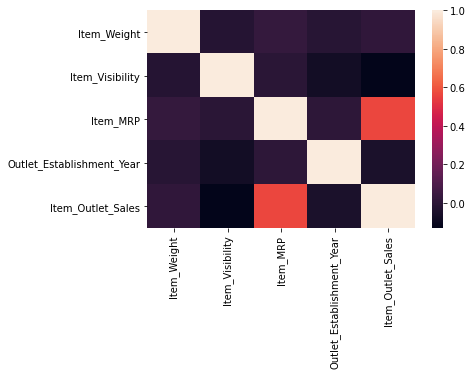

In [92]:
corelation=df.corr()
import seaborn as sns
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns)

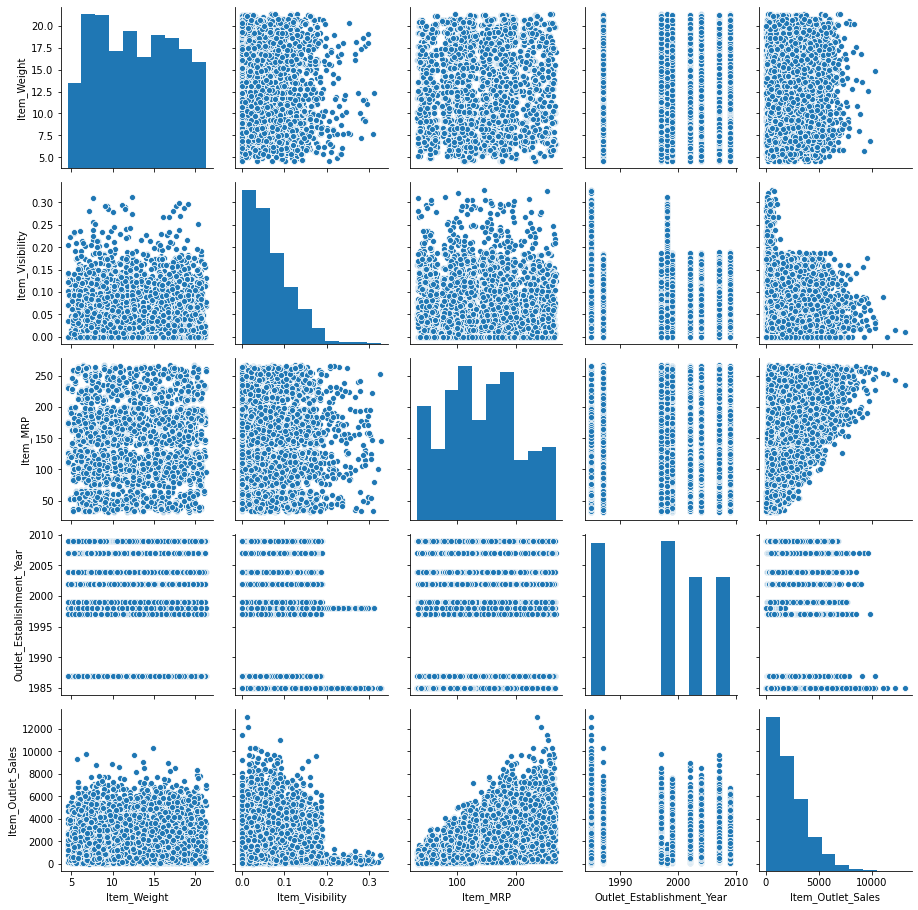

In [93]:
#pairplot-realtionship between two variables
sns.pairplot(df)

In [24]:
#independent variable
indep_var = df.iloc[:,:-1]
dep_var = df['Item_Outlet_Sales']
indep_var

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


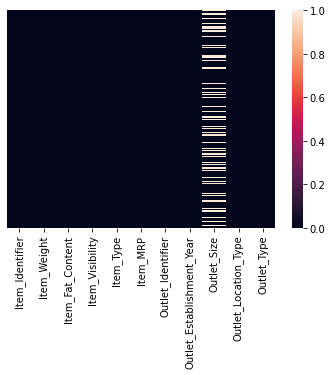

In [100]:
# to get  missing value in tain set
sns.heatmap(indep_var.isnull(),xticklabels=indep_var.columns,yticklabels=False)

In [25]:
#dependent variable
dep_var

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [26]:
#null values
indep_var.fillna(indep_var.mean(),inplace=True)
print(indep_var.isnull().sum())
print(indep_var)

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64
     Item_Identifier  Item_Weight  ... Outlet_Location_Type        Outlet_Type
0              FDA15        9.300  ...               Tier 1  Supermarket Type1
1              DRC01        5.920  ...               Tier 3  Supermarket Type2
2              FDN15       17.500  ...               Tier 1  Supermarket Type1
3              FDX07       19.200  ...               Tier 3      Grocery Store
4              NCD19        8.930  ...               Tier 3  Supermarket Type1
...              ...          ...  ...                  ...                ...
8518           FDF22        6.865  ...               Tier 3 

In [27]:
#drop
drop_cat=indep_var.drop('Outlet_Size',axis=1)
print(drop_cat)

     Item_Identifier  Item_Weight  ... Outlet_Location_Type        Outlet_Type
0              FDA15        9.300  ...               Tier 1  Supermarket Type1
1              DRC01        5.920  ...               Tier 3  Supermarket Type2
2              FDN15       17.500  ...               Tier 1  Supermarket Type1
3              FDX07       19.200  ...               Tier 3      Grocery Store
4              NCD19        8.930  ...               Tier 3  Supermarket Type1
...              ...          ...  ...                  ...                ...
8518           FDF22        6.865  ...               Tier 3  Supermarket Type1
8519           FDS36        8.380  ...               Tier 2  Supermarket Type1
8520           NCJ29       10.600  ...               Tier 2  Supermarket Type1
8521           FDN46        7.210  ...               Tier 3  Supermarket Type2
8522           DRG01       14.800  ...               Tier 1  Supermarket Type1

[8523 rows x 10 columns]


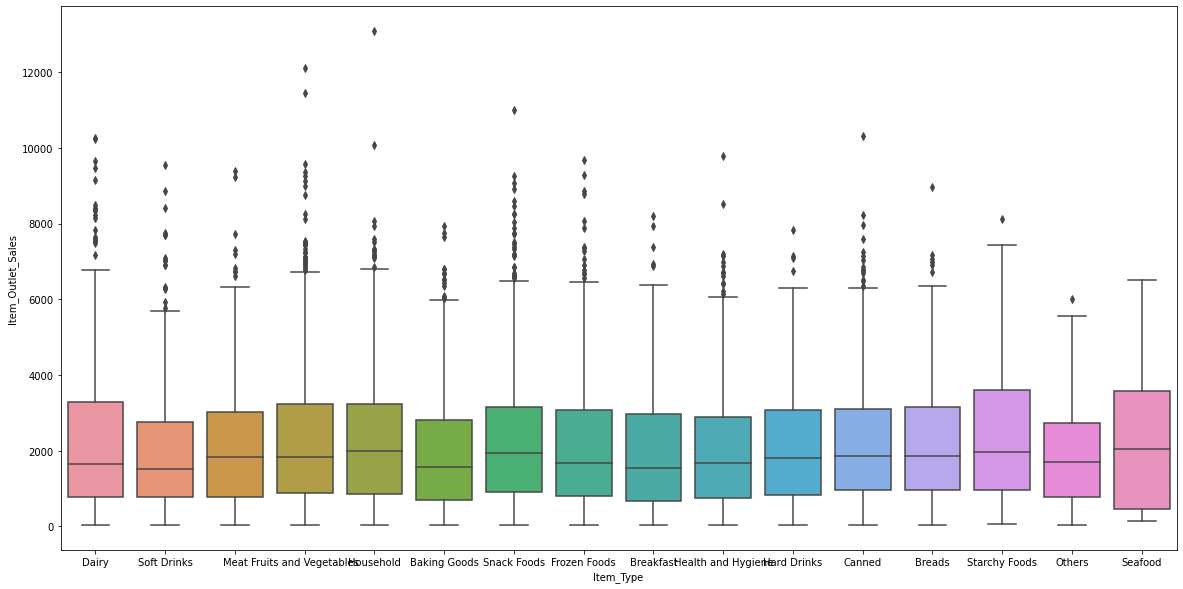

In [111]:
#box_plot
plt.figure(figsize=(20,10))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=df)

In [42]:
#dummy variables
'''from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type'])], remainder='passthrough')
X = np.array(ct.fit_transform(drop_cat))
print(X)'''
X=pd.get_dummies(drop_cat,columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type'])
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,Item_Identifier_DRE49,...,Item_Identifier_NCZ53,Item_Identifier_NCZ54,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,2002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#print(y_test)
#multiple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predict=regressor.predict(X_test)
print(y_predict)
coef=regressor.coef_
intercept=regressor.intercept_
print(coef)
print(intercept)

[ 6.04810998e+00 -7.28364724e+02 -1.34973184e+01 ... -1.74592101e+13
 -7.35771740e+12 -1.20962539e+13]
743941909566030.9


In [ ]:
#accuracy
accuracy=regressor.score()

In [73]:
print(len(X_train))
print(len(y_train))
print(y_train.shape)
print(y_predict.shape)

6818
6818
(6818,)
(1705,)


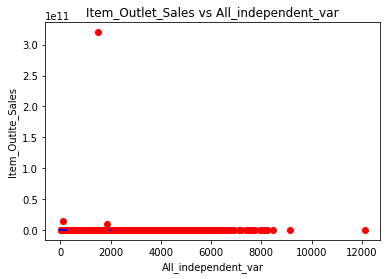

In [113]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_predict,color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Item_Outlet_Sales vs All_independent_var')
plt.xlabel('All_independent_var')
plt.ylabel('Item_Outlte_Sales')
plt.show()

In [81]:
#R-Square
from sklearn.metrics import r2_score
get_r_square=r2_score(y_test, y_predict,sample_weight=None, multioutput='uniform_average')
print(get_r_square)

-20589260603463.285


In [86]:
#RMSE
from sklearn.metrics import mean_squared_error
import math
get_mse= mean_squared_error(y_test,y_predict)
get_rmse = math.sqrt(get_mse)
print(get_rmse)


7762852054.774419


In [87]:
# MAPE
mape = np.abs((y_test-y_predict) /y_predict).mean(axis=0) * 100
print(mape)

66.61839179941809
